In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv


In [3]:
import pandas as pd
df = pd.read_csv("/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv")
print(df.head())


  roll_no gender race_ethnicity parental_level_of_education  lunch  \
0  std-01   male        group D                some college    1.0   
1  std-02   male        group B                 high school    1.0   
2  std-03   male        group C             master's degree    1.0   
3  std-04   male        group D                some college    1.0   
4  std-05   male        group C                some college    0.0   

   test_preparation_course math_score  reading_score  writing_score  \
0                      1.0         89           38.0           85.0   
1                      0.0         65          100.0           67.0   
2                      0.0         10           99.0           97.0   
3                      1.0         22           51.0           41.0   
4                      1.0         26           58.0           64.0   

   science_score  total_score grade  
0           26.0        238.0     C  
1           96.0        328.0     A  
2           58.0        264.0     B  


In [8]:
import pandas as pd
df = pd.read_csv("/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv")
print("Shape of the dataset:", df.shape)
print("Columns in the dataset:", df.columns)
print("Dataset info:")
df.info()
print("Summary of numeric columns:")
print(df.describe())




Shape of the dataset: (10000, 12)
Columns in the dataset: Index(['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 

In [13]:
print(df.isnull().sum())



roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     24
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64


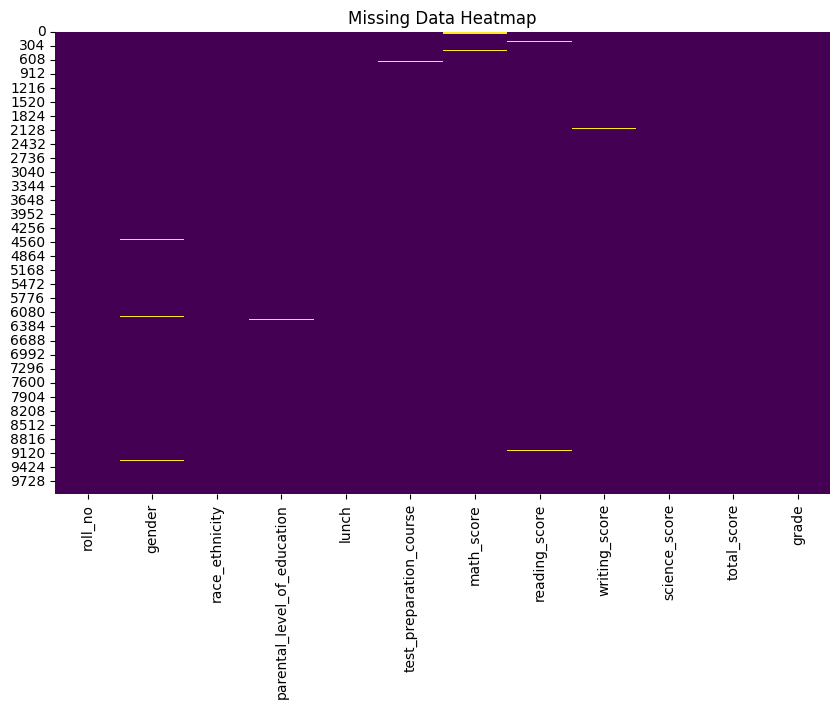

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [98]:
df['math_score'] = df['math_score'].fillna(df['math_score'].median())
df['reading_score'] = df['reading_score'].fillna(df['reading_score'].median())
df['writing_score'] = df['writing_score'].fillna(df['writing_score'].median())
df['science_score'] = df['science_score'].fillna(df['science_score'].median())
df['total_score'] = df['total_score'].fillna(df['total_score'].median())


In [99]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['parental_level_of_education'] = df['parental_level_of_education'].fillna(df['parental_level_of_education'].mode()[0])
df['lunch'] = df['lunch'].fillna(df['lunch'].mode()[0])
df['test_preparation_course'] = df['test_preparation_course'].fillna(df['test_preparation_course'].mode()[0])


In [100]:
df['math_score'] = pd.to_numeric(df['math_score'], errors='coerce')
df['math_score'] = df['math_score'].fillna(df['math_score'].median())
df['reading_score'] = pd.to_numeric(df['reading_score'], errors='coerce')
df['reading_score'] = df['reading_score'].fillna(df['reading_score'].median())

df['writing_score'] = pd.to_numeric(df['writing_score'], errors='coerce')
df['writing_score'] = df['writing_score'].fillna(df['writing_score'].median())

df['science_score'] = pd.to_numeric(df['science_score'], errors='coerce')
df['science_score'] = df['science_score'].fillna(df['science_score'].median())

df['total_score'] = pd.to_numeric(df['total_score'], errors='coerce')
df['total_score'] = df['total_score'].fillna(df['total_score'].median())



In [58]:
print(df.isnull().sum())


roll_no                        1
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
science_score                  0
total_score                    0
grade                          0
dtype: int64


In [61]:
print(df.dtypes)
print(df.describe())

roll_no                         object
gender                          object
race_ethnicity                  object
parental_level_of_education     object
lunch                          float64
test_preparation_course        float64
math_score                     float64
reading_score                  float64
writing_score                  float64
science_score                  float64
total_score                    float64
grade                           object
dtype: object
              lunch  test_preparation_course    math_score  reading_score  \
count  10000.000000             10000.000000  10000.000000   10000.000000   
mean       0.645100                 0.387800     57.180800      70.128100   
std        0.478507                 0.487273     21.720099      19.002495   
min        0.000000                 0.000000      0.000000      17.000000   
25%        0.000000                 0.000000     41.000000      57.000000   
50%        1.000000                 0.000000     58.0000

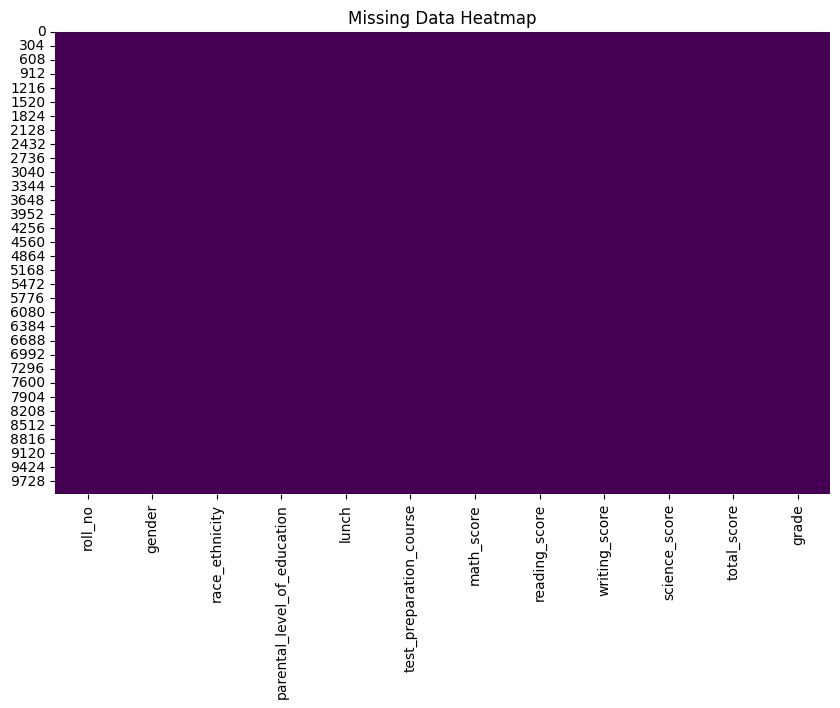

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [65]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    df = df.drop_duplicates()
duplicate_count_after = df.duplicated().sum()
print(f"Number of duplicate rows after dropping: {duplicate_count_after}")


Number of duplicate rows: 0
Number of duplicate rows after dropping: 0


In [66]:
print("Unique values in 'gender':", df['gender'].unique())
print("Unique values in 'race_ethnicity':", df['race_ethnicity'].unique())
print("Unique values in 'parental_level_of_education':", df['parental_level_of_education'].unique())
print("Unique values in 'lunch':", df['lunch'].unique())
print("Unique values in 'test_preparation_course':", df['test_preparation_course'].unique())
print("Unique values in 'grade':", df['grade'].unique())


Unique values in 'gender': ['male' 'female' 'Boy' '\\tmale' 'Girl']
Unique values in 'race_ethnicity': ['group D' 'group B' 'group C' 'group E' 'group A' 'A' 'C' 'D'
 'group C\\n' 'B' 'E']
Unique values in 'parental_level_of_education': ['some college' 'high school' "master's degree" "associate's degree"
 'some high school' "bachelor's degree"]
Unique values in 'lunch': [1. 0.]
Unique values in 'test_preparation_course': [1. 0.]
Unique values in 'grade': ['C' 'A' 'B' 'D' 'Fail']


In [67]:
df['gender'] = df['gender'].replace({'Boy': 'Male', 'Girl': 'Female', '\\tmale': 'Male'})
df['gender'] = df['gender'].str.strip().str.capitalize() 


In [68]:
df['race_ethnicity'] = df['race_ethnicity'].replace({
    'A': 'group A', 'B': 'group B', 'C': 'group C', 'D': 'group D', 'E': 'group E',
    'group C\\n': 'group C'  # Remove newline character
})


In [69]:
df['parental_level_of_education'] = df['parental_level_of_education'].str.strip().str.lower()
df['parental_level_of_education'] = df['parental_level_of_education'].replace({
    'some high school': 'Some High School', 'high school': 'High School',
    'some college': 'Some College', "bachelor's degree": "Bachelor's Degree",
    "associate's degree": "Associate's Degree", "master's degree": "Master's Degree"
})


In [70]:
df['lunch'] = df['lunch'].replace({1: 'Standard', 0: 'Free'})
df['test_preparation_course'] = df['test_preparation_course'].replace({1: 'Completed', 0: 'Not Completed'})
df['grade'] = df['grade'].str.strip().str.upper() 


In [71]:
print("Unique values in 'gender':", df['gender'].unique())
print("Unique values in 'race_ethnicity':", df['race_ethnicity'].unique())
print("Unique values in 'parental_level_of_education':", df['parental_level_of_education'].unique())
print("Unique values in 'lunch':", df['lunch'].unique())
print("Unique values in 'test_preparation_course':", df['test_preparation_course'].unique())
print("Unique values in 'grade':", df['grade'].unique())

Unique values in 'gender': ['Male' 'Female']
Unique values in 'race_ethnicity': ['group D' 'group B' 'group C' 'group E' 'group A']
Unique values in 'parental_level_of_education': ['Some College' 'High School' "Master's Degree" "Associate's Degree"
 'Some High School' "Bachelor's Degree"]
Unique values in 'lunch': ['Standard' 'Free']
Unique values in 'test_preparation_course': ['Completed' 'Not Completed']
Unique values in 'grade': ['C' 'A' 'B' 'D' 'FAIL']


In [72]:
df = df.drop(columns=['roll_no'])
print("Columns after drop:", df.columns)


Columns after drop: Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')


In [74]:
df['gender'] = df['gender'].astype('category')
df['grade'] = df['grade'].astype('category')
df['race_ethnicity'] = df['race_ethnicity'].astype('category')
df['parental_level_of_education'] = df['parental_level_of_education'].astype('category')
df['lunch'] = df['lunch'].astype('category')
df['test_preparation_course'] = df['test_preparation_course'].astype('category')
df['math_score'] = df['math_score'].astype('float')
df['reading_score'] = df['reading_score'].astype('float')
df['writing_score'] = df['writing_score'].astype('float')
df['science_score'] = df['science_score'].astype('float')
df['total_score'] = df['total_score'].astype('float')
print(df.dtypes)


gender                         category
race_ethnicity                 category
parental_level_of_education    category
lunch                          category
test_preparation_course        category
math_score                      float64
reading_score                   float64
writing_score                   float64
science_score                   float64
total_score                     float64
grade                          category
dtype: object


In [75]:
print("Gender distribution:")
print(df['gender'].value_counts())

print("Grade distribution:")
print(df['grade'].value_counts())

print("Race/Ethnicity distribution:")
print(df['race_ethnicity'].value_counts())

print("Parental Level of Education distribution:")
print(df['parental_level_of_education'].value_counts())

print("Lunch distribution:")
print(df['lunch'].value_counts())

print("Test Preparation Course distribution:")
print(df['test_preparation_course'].value_counts())


Gender distribution:
gender
Female    5011
Male      4989
Name: count, dtype: int64
Grade distribution:
grade
B       5662
C       2701
A        904
D        671
FAIL      62
Name: count, dtype: int64
Race/Ethnicity distribution:
race_ethnicity
group C    2951
group D    2572
group B    1900
group E    1513
group A    1064
Name: count, dtype: int64
Parental Level of Education distribution:
parental_level_of_education
Some College          2294
High School           1987
Associate's Degree    1905
Some High School      1742
Bachelor's Degree     1361
Master's Degree        711
Name: count, dtype: int64
Lunch distribution:
lunch
Standard    6451
Free        3549
Name: count, dtype: int64
Test Preparation Course distribution:
test_preparation_course
Not Completed    6122
Completed        3878
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

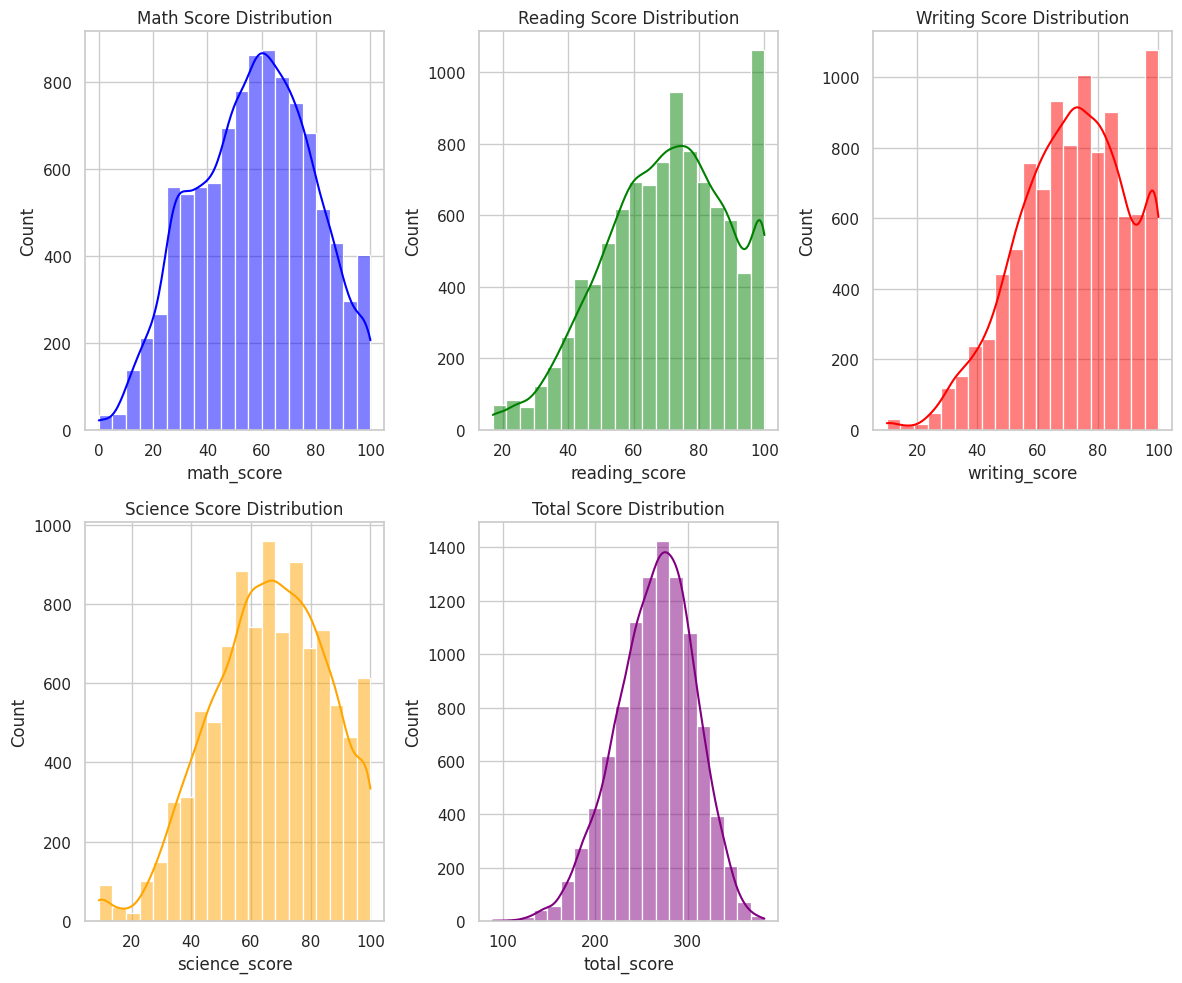

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))
plt.subplot(2, 3, 1)
sns.histplot(df['math_score'], kde=True, color='blue', bins=20)
plt.title('Math Score Distribution')
plt.subplot(2, 3, 2)
sns.histplot(df['reading_score'], kde=True, color='green', bins=20)
plt.title('Reading Score Distribution')
plt.subplot(2, 3, 3)
sns.histplot(df['writing_score'], kde=True, color='red', bins=20)
plt.title('Writing Score Distribution')
plt.subplot(2, 3, 4)
sns.histplot(df['science_score'], kde=True, color='orange', bins=20)
plt.title('Science Score Distribution')
plt.subplot(2, 3, 5)
sns.histplot(df['total_score'], kde=True, color='purple', bins=20)
plt.title('Total Score Distribution')

plt.tight_layout()
plt.show()


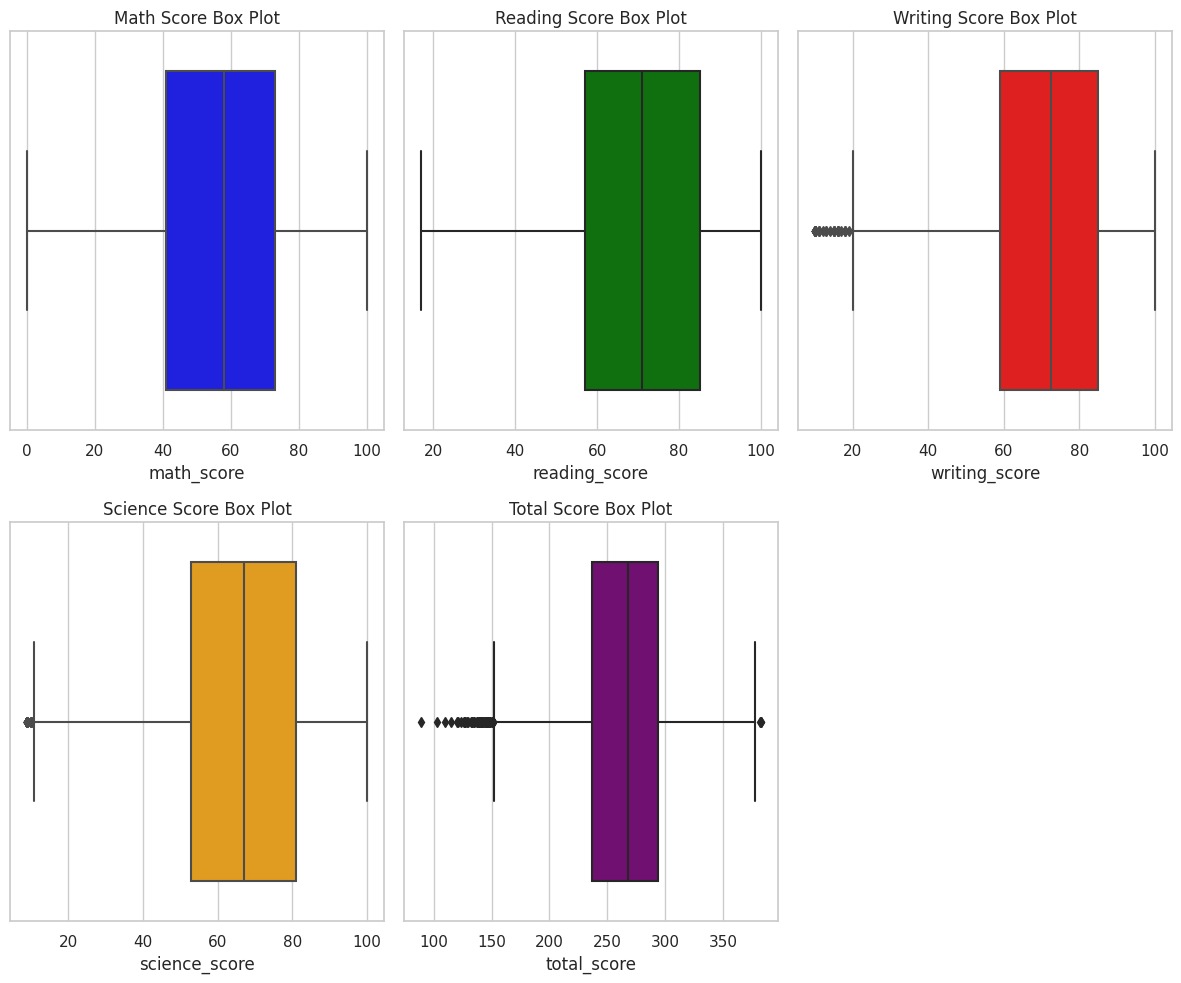

In [78]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 3, 1)
sns.boxplot(x=df['math_score'], color='blue')
plt.title('Math Score Box Plot')
plt.subplot(2, 3, 2)
sns.boxplot(x=df['reading_score'], color='green')
plt.title('Reading Score Box Plot')
plt.subplot(2, 3, 3)
sns.boxplot(x=df['writing_score'], color='red')
plt.title('Writing Score Box Plot')
plt.subplot(2, 3, 4)
sns.boxplot(x=df['science_score'], color='orange')
plt.title('Science Score Box Plot')
plt.subplot(2, 3, 5)
sns.boxplot(x=df['total_score'], color='purple')
plt.title('Total Score Box Plot')

plt.tight_layout()
plt.show()


In [79]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound
numeric_columns = ['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']
for column in numeric_columns:
    outliers, lower, upper = detect_outliers(df, column)
    print(f"Outliers in {column}:")
    print(outliers[[column]])
    print(f"Lower bound: {lower}, Upper bound: {upper}\n")


Outliers in math_score:
Empty DataFrame
Columns: [math_score]
Index: []
Lower bound: -7.0, Upper bound: 121.0

Outliers in reading_score:
Empty DataFrame
Columns: [reading_score]
Index: []
Lower bound: 15.0, Upper bound: 127.0

Outliers in writing_score:
      writing_score
93             18.0
213            10.0
320            16.0
729            10.0
833            15.0
867            16.0
1097           10.0
1210           10.0
1446           10.0
1478           16.0
1507           11.0
1627           10.0
1824           10.0
1963           12.0
2069           10.0
2301           10.0
2420           10.0
2556           10.0
2824           10.0
2900           10.0
3169           10.0
3253           17.0
3315           10.0
3414           10.0
3527           10.0
3631           16.0
3702           18.0
3704           19.0
3886           16.0
3927           10.0
3984           10.0
4068           13.0
4129           11.0
4152           10.0
4178           10.0
4374           18.0
4492 

In [85]:
for column in numeric_columns:
    outliers, lower, upper = detect_outliers(df, column)
    df[column] = df[column].clip(lower=lower, upper=upper)


In [87]:

for column in numeric_columns:
    outliers, lower, upper = detect_outliers(df, column)
    df = df[(df[column] >= lower) & (df[column] <= upper)]

In [88]:
df['total_score'] = df['total_score'].apply(lambda x: np.log(x + 1)) 
print(df.head())

  gender race_ethnicity parental_level_of_education     lunch  \
0   Male        group D                Some College  Standard   
1   Male        group B                 High School  Standard   
2   Male        group C             Master's Degree  Standard   
3   Male        group D                Some College  Standard   
4   Male        group C                Some College      Free   

  test_preparation_course  math_score  reading_score  writing_score  \
0               Completed        89.0           38.0           85.0   
1           Not Completed        65.0          100.0           67.0   
2           Not Completed        10.0           99.0           97.0   
3               Completed        22.0           51.0           41.0   
4               Completed        26.0           58.0           64.0   

   science_score  total_score grade  
0           26.0     1.868175     C  
1           96.0     1.916343     A  
2           58.0     1.883994     B  
3           84.0     1.839486 

In [90]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.DataFrame({
    'gender': ['Male', 'Female', 'Female', 'Male'],
    'grade': ['A', 'B', 'C', 'A'],
    'race_ethnicity': ['group A', 'group B', 'group C', 'group D'],
    'lunch': ['Standard', 'Free', 'Standard', 'Free'],
    'test_preparation_course': ['Completed', 'Not Completed', 'Completed', 'Not Completed']
})
df_encoded = pd.get_dummies(df, drop_first=True)
print("DataFrame after One-Hot Encoding:\n", df_encoded)
label_encoder = LabelEncoder()
df['grade'] = label_encoder.fit_transform(df['grade'])
df['lunch'] = label_encoder.fit_transform(df['lunch'])
df['test_preparation_course'] = label_encoder.fit_transform(df['test_preparation_course'])

print("\nDataFrame after Label Encoding:\n", df)


DataFrame after One-Hot Encoding:
    gender_Male  grade_B  grade_C  race_ethnicity_group B  \
0         True    False    False                   False   
1        False     True    False                    True   
2        False    False     True                   False   
3         True    False    False                   False   

   race_ethnicity_group C  race_ethnicity_group D  lunch_Standard  \
0                   False                   False            True   
1                   False                   False           False   
2                    True                   False            True   
3                   False                    True           False   

   test_preparation_course_Not Completed  
0                                  False  
1                                   True  
2                                  False  
3                                   True  

DataFrame after Label Encoding:
    gender  grade race_ethnicity  lunch  test_preparation_course
0    

In [101]:
print(df.columns)


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')


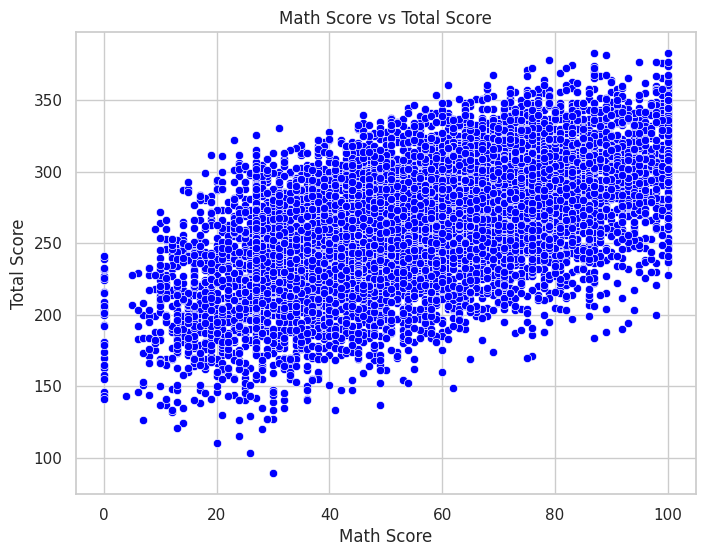

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='math_score', y='total_score', color='blue')
plt.title('Math Score vs Total Score')
plt.xlabel('Math Score')
plt.ylabel('Total Score')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


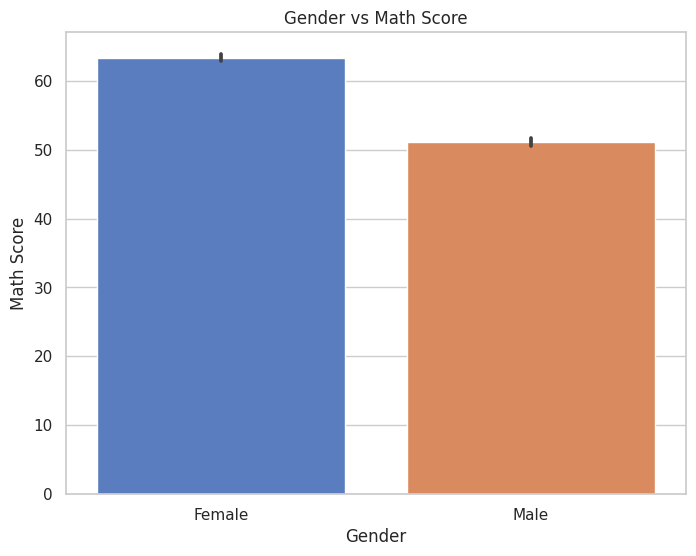

In [103]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='gender', y='math_score', palette='muted')
plt.title('Gender vs Math Score')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


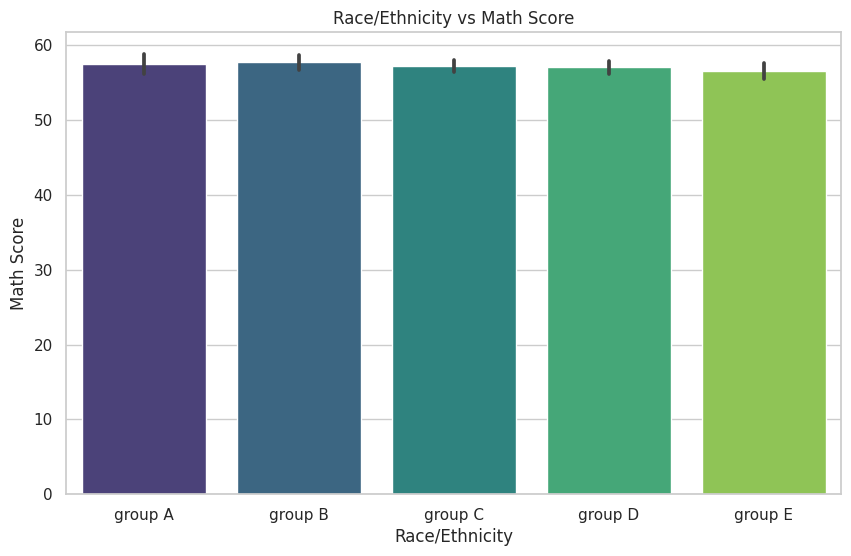

In [105]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='race_ethnicity', y='math_score', palette='viridis')
plt.title('Race/Ethnicity vs Math Score')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Math Score')
plt.show()


In [108]:
max_score = 400  
df['performance_ratio'] = df['total_score'] / max_score
print(df[['total_score', 'performance_ratio']].head())


   total_score  performance_ratio
0        238.0             0.5950
1        328.0             0.8200
2        264.0             0.6600
3        198.0             0.4950
4        213.0             0.5325


In [110]:
bins = [0, 50, 75, 100]  
labels = ['Low', 'Medium', 'High']  
df['math_score_category'] = pd.cut(df['math_score'], bins=bins, labels=labels, include_lowest=True)
print(df[['math_score', 'math_score_category']].head())


   math_score math_score_category
0        89.0                High
1        65.0              Medium
2        10.0                 Low
3        22.0                 Low
4        26.0                 Low


In [112]:
bins = [0, 0.5, 0.75, 1.0]
labels = ['Below Average', 'Average', 'Above Average']
df['performance_category'] = pd.cut(df['performance_ratio'], bins=bins, labels=labels, include_lowest=True)
print(df[['performance_ratio', 'performance_category']].head())


   performance_ratio performance_category
0             0.5950              Average
1             0.8200        Above Average
2             0.6600              Average
3             0.4950        Below Average
4             0.5325              Average


Correlation Matrix:
                   math_score  reading_score  writing_score  science_score  \
math_score           1.000000      -0.035964       0.096341       0.084844   
reading_score       -0.035964       1.000000       0.024147       0.059660   
writing_score        0.096341       0.024147       1.000000       0.099085   
science_score        0.084844       0.059660       0.099085       1.000000   
total_score          0.576838       0.468316       0.536659       0.568844   
performance_ratio    0.576838       0.468316       0.536659       0.568844   

                   total_score  performance_ratio  
math_score            0.576838           0.576838  
reading_score         0.468316           0.468316  
writing_score         0.536659           0.536659  
science_score         0.568844           0.568844  
total_score           1.000000           1.000000  
performance_ratio     1.000000           1.000000  


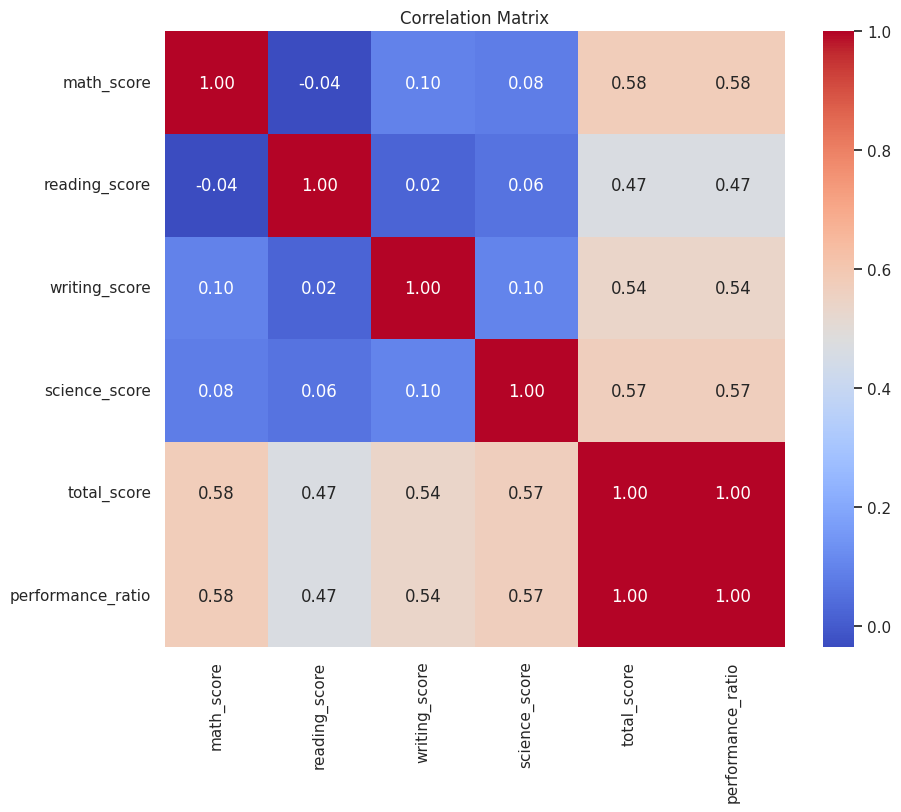

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.show()
